In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt


file_name="data/donnees_physicochimie.csv.zst"
pc_sample = pd.read_csv(file_name,nrows=1)
pc_list_cols = pc_sample.columns
pc_list_cat = pc_list_cols[pc_list_cols.str.startswith((
    'Lb','Nom','Mnemo',
    'Cd','Sym','Com'))]

pc_dict_cat = {col: 'category' for col in pc_list_cat}

df_physico = pd.read_csv(
        "data/donnees_physicochimie.csv.zst",
        sep=',',
        dtype=pc_dict_cat,
        engine='c',
        escapechar='\\',
        parse_dates=[7],
        iterator=False)

df_hydrobio = pd.read_csv("data/donnees_hydrobio.csv.zst", sep=',')
df_stations = pd.read_csv("data/stations_hb.csv.zst", sep=';', escapechar='\\')

In [2]:
# Conversion des dates
df_physico["DatePrel"] = pd.to_datetime(df_physico["DatePrel"])
df_hydrobio["DateDebutOperationPrelBio"] = pd.to_datetime(
    df_hydrobio["DateDebutOperationPrelBio"]
)

# Jointure des données géographiques
df_physico = df_physico.merge(
    df_stations[
        [
            "CdStationMesureEauxSurface",
            "CoordXStationMesureEauxSurface",
            "CoordYStationMesureEauxSurface",
            "CodeRegion",
            "AltitudePointCaracteritisque",
        ]
    ],
    on="CdStationMesureEauxSurface",
)

# Création d'une colonne saison
df_physico["Saison"] = df_physico["DatePrel"].dt.quarter
df_physico["SaisonLbl"] = df_physico["Saison"].map(
    {1: "Hiver", 2: "Printemps", 3: "Été", 4: "Automne"}
)
df_hydrobio["Saison"] = df_hydrobio["DateDebutOperationPrelBio"].dt.quarter
df_hydrobio["SaisonLbl"] = df_hydrobio["Saison"].map(
    {1: "Hiver", 2: "Printemps", 3: "Été", 4: "Automne"}
)

df_stations.columns


Index(['CdStationMesureEauxSurface', 'LbStationMesureEauxSurface',
       'DurStationMesureEauxSurface', 'CoordXStationMesureEauxSurface',
       'CoordYStationMesureEauxSurface', 'CdProjStationMesureEauxSurface',
       'LibelleProjection', 'CodeCommune', 'LbCommune', 'CodeDepartement',
       'LbDepartement', 'CodeRegion', 'LbRegion', 'CdMasseDEau',
       'CdEuMasseDEau', 'NomMasseDEau', 'CdEuSsBassinDCEAdmin',
       'NomSsBassinDCEAdmin', 'CdBassinDCE', 'CdEuBassinDCE', 'NomEuBassinDCE',
       'CdTronconHydrographique', 'CdCoursdEau', 'NomCoursdEau',
       'CodeTypEthStationMesureEauxSurface',
       'LibelleTypEthStationMesureEauxSurface', 'ComStationMesureEauxSurface',
       'DateCreationStationMesureEauxSurface',
       'DateArretActiviteStationMesureEauxSurface',
       'DateMAJInfosStationMesureEauxSurface',
       'FinaliteStationMesureEauxSurface',
       'LocPreciseStationMesureEauxSurface',
       'CodeNatureStationMesureEauxSurface',
       'LibelleNatureStationMesure

In [3]:
df_hydrobio["CdStationMesureEauxSurface"] = df_hydrobio["CdStationMesureEauxSurface"].astype(str)
df_physico["CdStationMesureEauxSurface"] = df_physico["CdStationMesureEauxSurface"].astype(str)
df_stations["CdStationMesureEauxSurface"] = df_stations["CdStationMesureEauxSurface"].astype(str)

# remove leading 0
df_hydrobio["CdStationMesureEauxSurface"] = df_hydrobio["CdStationMesureEauxSurface"].str.lstrip("0")
df_stations["CdStationMesureEauxSurface"] = df_stations["CdStationMesureEauxSurface"].str.lstrip("0")
df_physico["CdStationMesureEauxSurface"] = df_physico["CdStationMesureEauxSurface"].str.lstrip("0")

l = df_hydrobio["CdStationMesureEauxSurface"].tolist()
l = list(set(l))


m = df_stations["CdStationMesureEauxSurface"].tolist()
m = list(set(m))

n = df_physico["CdStationMesureEauxSurface"].tolist()
n = list(set(n))

print(l)
print(m)
print(n)

print(f"nb in both {len(set(l).intersection(set(m)))}")
print(f"nb in both {len(set(l).intersection(set(n)))}")

['6208900', '4464002', '6000238', '4412010', '6086100', '4606012', '4429022', '4338006', '6113125', '6176080', '3085558', '4406089', '5068700', '6820081', '4431009', '6094280', '5183910', '2076100', '5010985', '6148380', '3024545', '6175000', '4474000', '6580477', '3149158', '5184710', '4541004', '6200590', '3189313', '4307000', '6000395', '6205955', '5023200', '4374005', '6469500', '6460850', '4422007', '4172620', '6042500', '1134500', '4604008', '6700094', '6106250', '6047400', '5080960', '4090500', '6138450', '4041050', '4176480', '4171385', '3149353', '4417020', '6120300', '4378009', '4186700', '6416855', '3164180', '4466001', '6178030', '5119067', '5181600', '2116600', '5111390', '4637019', '5074840', '4023780', '3243540', '5022400', '4090100', '5097000', '6157895', '4077000', '2072670', '5108145', '6471450', '3168035', '5207060', '5096810', '3073000', '3008833', '5002610', '4653000', '2121750', '5144520', '5214600', '3268250', '6172100', '3247140', '3234338', '5061300', '5139130'

In [4]:

print(df_hydrobio.shape)
print(df_stations.shape)

df_hydrobio_merged = df_hydrobio.merge(
    df_stations[
        [
            "CdStationMesureEauxSurface",
            "CoordXStationMesureEauxSurface", 
            "CoordYStationMesureEauxSurface",
            "CodeRegion",
            "LbRegion",
            "CdMasseDEau",
            "AltitudePointCaracteritisque",
            
        ]
    ],
    on="CdStationMesureEauxSurface",
)
print(df_hydrobio_merged.shape)

(43535, 23)
(6579, 39)
(24345, 29)


In [96]:
df_hydrobio_merged.columns

Index(['Unnamed: 0', 'CdStationMesureEauxSurface',
       'LbStationMesureEauxSurface', 'CdPointEauxSurf',
       'DateDebutOperationPrelBio', 'CdSupport', 'LbSupport',
       'DtProdResultatBiologique', 'CdParametreResultatBiologique',
       'LbLongParametre', 'ResIndiceResultatBiologique', 'CdUniteMesure',
       'SymUniteMesure', 'CdRqIndiceResultatBiologique', 'MnemoRqAna',
       'CdMethEval', 'RefOperationPrelBio', 'CdProducteur', 'NomProducteur',
       'CdAccredRsIndiceResultatBiologique',
       'MnAccredRsIndiceResultatBiologique', 'Saison',
       'CoordXStationMesureEauxSurface', 'CoordYStationMesureEauxSurface',
       'CodeRegion', 'AltitudePointCaracteritisque'],
      dtype='object')

In [91]:
df_hydrobio_merged["CdStationMesureEauxSurface"].value_counts().idxmax()

'6169950'

In [ ]:
print(df_hydrobio_merged[df_hydrobio_merged["CdStationMesureEauxSurface"] == "6169950"])

In [10]:
pd.set_option('display.max_columns', None)
print(df_physico.shape)
df_physico.head()

(4770025, 55)


,CdStationMesureEauxSurface,LbStationMesureEauxSurface,CdSupport,LbSupport,CdFractionAnalysee,LbFractionAnalysee,CdPrelevement,DatePrel,HeurePrel,CdParametre,LbLongParamètre,RsAna,CdUniteMesure,SymUniteMesure,CdRqAna,MnemoRqAna,CdInsituAna,LbInsituAna,ProfondeurPrel,CdDifficulteAna,MnemoDifficulteAna,LdAna,LqAna,LsAna,IncertAna,CdMetFractionnement,NomMetFractionnement,CdMethode,NomMethode,RdtExtraction,CdMethodeExtraction,NomMethodeExtraction,CdAccreAna,MnemoAccredAna,AgreAna,CdStatutAna,MnemoStatutAna,CdQualAna,LbQualAna,CommentairesAna,ComResultatAna,CdRdd,NomRdd,CdProducteur,NomProducteur,CdPreleveur,NomPreleveur,CdLaboratoire,NomLaboratoire,CoordXStationMesureEauxSurface,CoordYStationMesureEauxSurface,CodeRegion,AltitudePointCaracteritisque,Saison,SaisonLbl
0,5001800,L'Arnoult en amont de Pont l'Abbé d'Arnoult,3,Eau,23,Eau brute,198487,2005-01-19,15:00:00,1301,Température de l'Eau,8.1,27,°C,1,Résultat > seuil de quantification et < au seu...,1,In situ,NaN,0,Difficultés inconnues,NaN,NaN,NaN,NaN,NaN,NaN,0,Méthode inconnue,NaN,NaN,NaN,0,Inconnu,NaN,2,Donnée contrôlée niveau 1 (données contrôlées),1,Correcte,NaN,NaN,NaN,NaN,18310006400033,AGENCE DE L'EAU ADOUR GARONNE,18310006400033,AGENCE DE L'EAU ADOUR GARONNE,18310006400033,AGENCE DE L'EAU ADOUR GARONNE,399856.0,6531980.0,75.0,10.0,1,Hiver
1,5001800,L'Arnoult en amont de Pont l'Abbé d'Arnoult,3,Eau,23,Eau brute,198487,2005-01-19,15:00:00,1302,Potentiel en Hydrogène (pH),7.8,264,unité pH,1,Résultat > seuil de quantification et < au seu...,1,In situ,NaN,0,Difficultés inconnues,NaN,NaN,NaN,NaN,NaN,NaN,0,Méthode inconnue,NaN,NaN,NaN,0,Inconnu,NaN,2,Donnée contrôlée niveau 1 (données contrôlées),1,Correcte,NaN,NaN,NaN,NaN,18310006400033,AGENCE DE L'EAU ADOUR GARONNE,18310006400033,AGENCE DE L'EAU ADOUR GARONNE,18310006400033,AGENCE DE L'EAU ADOUR GARONNE,399856.0,6531980.0,75.0,10.0,1,Hiver
2,5001800,L'Arnoult en amont de Pont l'Abbé d'Arnoult,3,Eau,23,Eau brute,198487,2005-01-19,15:00:00,1303,Conductivité à 25°C,845.0,147,µS/cm,1,Résultat > seuil de quantification et < au seu...,1,In situ,NaN,0,Difficultés inconnues,NaN,NaN,NaN,NaN,NaN,NaN,0,Méthode inconnue,NaN,NaN,NaN,0,Inconnu,NaN,2,Donnée contrôlée niveau 1 (données contrôlées),1,Correcte,NaN,NaN,NaN,NaN,18310006400033,AGENCE DE L'EAU ADOUR GARONNE,18310006400033,AGENCE DE L'EAU ADOUR GARONNE,18310006400033,AGENCE DE L'EAU ADOUR GARONNE,399856.0,6531980.0,75.0,10.0,1,Hiver
3,5001800,L'Arnoult en amont de Pont l'Abbé d'Arnoult,3,Eau,23,Eau brute,198487,2005-01-19,15:00:00,1311,Oxygène dissous,11.6,175,mg(O2)/L,1,Résultat > seuil de quantification et < au seu...,1,In situ,NaN,0,Difficultés inconnues,NaN,NaN,NaN,NaN,NaN,NaN,0,Méthode inconnue,NaN,NaN,NaN,0,Inconnu,NaN,2,Donnée contrôlée niveau 1 (données contrôlées),1,Correcte,NaN,NaN,NaN,NaN,18310006400033,AGENCE DE L'EAU ADOUR GARONNE,18310006400033,AGENCE DE L'EAU ADOUR GARONNE,18310006400033,AGENCE DE L'EAU ADOUR GARONNE,399856.0,6531980.0,75.0,10.0,1,Hiver
4,5001800,L'Arnoult en amont de Pont l'Abbé d'Arnoult,3,Eau,23,Eau brute,198487,2005-01-19,15:00:00,1312,Taux de saturation en oxygène,98.0,243,%,1,Résultat > seuil de quantification et < au seu...,1,In situ,NaN,0,Difficultés inconnues,NaN,NaN,NaN,NaN,NaN,NaN,0,Méthode inconnue,NaN,NaN,NaN,0,Inconnu,NaN,2,Donnée contrôlée niveau 1 (données contrôlées),1,Correcte,NaN,NaN,NaN,NaN,18310006400033,AGENCE DE L'EAU ADOUR GARONNE,18310006400033,AGENCE DE L'EAU ADOUR GARONNE,18310006400033,AGENCE DE L'EAU ADOUR GARONNE,399856.0,6531980.0,75.0,10.0,1,Hiver


In [13]:
# show all unique values and count for LbLongParamètre
df_physico["LbLongParamètre"].value_counts()

LbLongParamètre
Température de l'Eau                                   366243
Potentiel en Hydrogène (pH)                            365874
Conductivité à 25°C                                    361762
Oxygène dissous                                        340240
Taux de saturation en oxygène                          323035
Matières en suspension                                 312374
Phosphore total                                        302234
Demande Biochimique en oxygène en 5 jours (D.B.O.5)    291314
Nitrates                                               290545
Orthophosphates (PO4)                                  288418
Carbone Organique                                      286897
Nitrites                                               283151
Azote Kjeldahl                                         282802
Ammonium                                               274458
Turbidité Formazine Néphélométrique                    218603
Diuron                                                

In [50]:
# keep only 
keep_only="Nitrates"
unit = ""

df_physico_nitrites = df_physico[df_physico["LbLongParamètre"] == keep_only]

# merge with stations
df_physico_nitrites_merged = df_physico_nitrites.merge(
    df_stations[
        [
            "CdStationMesureEauxSurface",
            "LbRegion",    
        ]
    ],
    on="CdStationMesureEauxSurface",
)
print(df_physico_nitrites_merged.shape)

# show all value counts of LbRegion
df_physico_nitrites_merged["LbRegion"].value_counts()

# keep only 5 most present lblregions
lblregions = df_physico_nitrites_merged["LbRegion"].value_counts().index[:7]
df_physico_nitrites_merged = df_physico_nitrites_merged[df_physico_nitrites_merged["LbRegion"].isin(lblregions)]
df_physico_nitrites_merged["LbRegion"].value_counts()

(290545, 56)


LbRegion
AUVERGNE-RHONE-ALPES       50391
OCCITANIE                  43307
BOURGOGNE-FRANCHE-COMTE    37607
GRAND-EST                  35260
NOUVELLE-AQUITAINE         32773
NORMANDIE                  17282
BRETAGNE                   15305
Name: count, dtype: int64

In [51]:
df_physico_nitrites_merged.head()

,CdStationMesureEauxSurface,LbStationMesureEauxSurface,CdSupport,LbSupport,CdFractionAnalysee,LbFractionAnalysee,CdPrelevement,DatePrel,HeurePrel,CdParametre,LbLongParamètre,RsAna,CdUniteMesure,SymUniteMesure,CdRqAna,MnemoRqAna,CdInsituAna,LbInsituAna,ProfondeurPrel,CdDifficulteAna,MnemoDifficulteAna,LdAna,LqAna,LsAna,IncertAna,CdMetFractionnement,NomMetFractionnement,CdMethode,NomMethode,RdtExtraction,CdMethodeExtraction,NomMethodeExtraction,CdAccreAna,MnemoAccredAna,AgreAna,CdStatutAna,MnemoStatutAna,CdQualAna,LbQualAna,CommentairesAna,ComResultatAna,CdRdd,NomRdd,CdProducteur,NomProducteur,CdPreleveur,NomPreleveur,CdLaboratoire,NomLaboratoire,CoordXStationMesureEauxSurface,CoordYStationMesureEauxSurface,CodeRegion,AltitudePointCaracteritisque,Saison,SaisonLbl,LbRegion
0,3034370,LE SEREIN A VIC-SOUS-THIL 1,2,Air,3,"Phase aqueuse de l'eau (filtrée, centrifugée...)",20190316214644-PC-190598,2005-01-17,00:00:00,1340,Nitrates,20.3,173,mg(NO3)/L,1,Résultat > seuil de quantification et < au seu...,0,Localisation inconnue,NaN,0,Difficultés inconnues,NaN,0.1,NaN,NaN,NaN,NaN,266,"Qualité de l'eau - Dosage des ions fluorure, c...",NaN,NaN,NaN,2,Analyse réalisée hors accréditation,0.0,3,Donnée contrôlée niveau 2 (données validées),0,Qualification non definissable,Sans commentaire,Sans commentaire,NaN,NaN,18750009500026,AGENCE DE L'EAU SEINE-NORMANDIE,43796067700049,ASCONIT CONSULTANTS,41054531300018,CARSO - LABORATOIRE SANTE ENVIRONNEMENT HYGIEN...,799473.0,6694133.0,27.0,0.0,1,Hiver,BOURGOGNE-FRANCHE-COMTE
1,3034370,LE SEREIN A VIC-SOUS-THIL 1,2,Air,3,"Phase aqueuse de l'eau (filtrée, centrifugée...)",20190317065440-PC-237285,2005-02-14,00:00:00,1340,Nitrates,14.4,173,mg(NO3)/L,1,Résultat > seuil de quantification et < au seu...,0,Localisation inconnue,NaN,0,Difficultés inconnues,NaN,0.1,NaN,NaN,NaN,NaN,266,"Qualité de l'eau - Dosage des ions fluorure, c...",NaN,NaN,NaN,2,Analyse réalisée hors accréditation,0.0,3,Donnée contrôlée niveau 2 (données validées),0,Qualification non definissable,Sans commentaire,Sans commentaire,NaN,NaN,18750009500026,AGENCE DE L'EAU SEINE-NORMANDIE,43796067700049,ASCONIT CONSULTANTS,41054531300018,CARSO - LABORATOIRE SANTE ENVIRONNEMENT HYGIEN...,799473.0,6694133.0,27.0,0.0,1,Hiver,BOURGOGNE-FRANCHE-COMTE
2,3034370,LE SEREIN A VIC-SOUS-THIL 1,2,Air,3,"Phase aqueuse de l'eau (filtrée, centrifugée...)",20190316101801-PC-131420,2005-03-14,00:00:00,1340,Nitrates,14.7,173,mg(NO3)/L,1,Résultat > seuil de quantification et < au seu...,0,Localisation inconnue,NaN,0,Difficultés inconnues,NaN,0.1,NaN,NaN,NaN,NaN,266,"Qualité de l'eau - Dosage des ions fluorure, c...",NaN,NaN,NaN,2,Analyse réalisée hors accréditation,0.0,3,Donnée contrôlée niveau 2 (données validées),0,Qualification non definissable,Sans commentaire,Sans commentaire,NaN,NaN,18750009500026,AGENCE DE L'EAU SEINE-NORMANDIE,43796067700049,ASCONIT CONSULTANTS,41054531300018,CARSO - LABORATOIRE SANTE ENVIRONNEMENT HYGIEN...,799473.0,6694133.0,27.0,0.0,1,Hiver,BOURGOGNE-FRANCHE-COMTE
3,3034370,LE SEREIN A VIC-SOUS-THIL 1,3,Eau,3,"Phase aqueuse de l'eau (filtrée, centrifugée...)",20190316234514-PC-200342,2005-04-18,00:00:00,1340,Nitrates,12.4,173,mg(NO3)/L,1,Résultat > seuil de quantification et < au seu...,0,Localisation inconnue,NaN,0,Difficultés inconnues,NaN,0.1,NaN,NaN,NaN,NaN,266,"Qualité de l'eau - Dosage des ions fluorure, c...",NaN,NaN,NaN,2,Analyse réalisée hors accréditation,0.0,3,Donnée contrôlée niveau 2 (données validées),0,Qualification non definissable,Sans commentaire,Sans commentaire,NaN,NaN,18750009500026,AGENCE DE L'EAU SEINE-NORMANDIE,43796067700049,ASCONIT CONSULTANTS,41054531300018,CARSO - LABORATOIRE SANTE ENVIRONNEMENT HYGIEN...,799473.0,6694133.0,27.0,0.0,2,Printemps,BOURGOGNE-FRANCHE-COMTE
4,3034370,LE SEREIN A VIC-SOUS-THIL 1,2,Air,3,"Phase aqueuse de l'eau (filtrée, centrifugée...)",20190316134749-PC-149183,2005-05-16,00:00:00,1340,Nitrates,9.9,173,mg(NO3)/L,10,Résultat < au seuil de quantification,0,Localisation inconnue,NaN,0,Di

In [52]:
import geopandas as gpd

def plot_spatial_distribution():
    # Création d'un GeoDataFrame
    geometry = gpd.points_from_xy(df_stations['CoordXStationMesureEauxSurface'], 
                                df_stations['CoordYStationMesureEauxSurface'])
    gdf = gpd.GeoDataFrame(df_stations, geometry=geometry)
    
    # Plot avec contexte géographique
    fig, ax = plt.subplots(figsize=(15, 10))
    gdf.plot(ax=ax, alpha=0.5)
    plt.title("Distribution spatiale des stations de mesure")
    plt.show()

In [5]:
def analyze_correlations():
    # Pivot table pour avoir les paramètres en colonnes
    pivot_physico = df_physico.pivot_table(index=['CdStationMesureEauxSurface', 'DatePrel'],
                                         columns='LbLongParamètre',
                                         values='RsAna',
                                         aggfunc='mean')
    
    # Matrice de corrélation
    plt.figure(figsize=(12, 10))
    sns.heatmap(pivot_physico.corr(), annot=True, cmap='coolwarm')
    plt.title("Matrice de corrélation des paramètres physico-chimiques")
    plt.show()

In [117]:
def regional_analysis():
    # Visualisation
    plt.figure(figsize=(15, 8))
    sns.boxplot(
        data=df_hydrobio_merged,
        x="LbRegion",
        y="ResIndiceResultatBiologique",
        hue="SaisonLbl",
        showfliers=False,
    )
    plt.title("Distribution des indices biologiques par région et saison")
    plt.xticks(rotation=45)

In [88]:
def seasonal_patterns():
    # Visualisation
    plt.figure(figsize=(12, 8))
    sns.boxplot(
        data=df_physico_nitrites_merged,
        x="SaisonLbl",
        y="RsAna",
        hue="LbRegion",
        showfliers=False,
    )
    plt.title(
        f"Variations saisonnières des paramètres physico-chimiques : {keep_only} ({unit})"
    )
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()

In [70]:
df_physico.columns

Index(['CdStationMesureEauxSurface', 'LbStationMesureEauxSurface', 'CdSupport',
       'LbSupport', 'CdFractionAnalysee', 'LbFractionAnalysee',
       'CdPrelevement', 'DatePrel', 'HeurePrel', 'CdParametre',
       'LbLongParamètre', 'RsAna', 'CdUniteMesure', 'SymUniteMesure',
       'CdRqAna', 'MnemoRqAna', 'CdInsituAna', 'LbInsituAna', 'ProfondeurPrel',
       'CdDifficulteAna', 'MnemoDifficulteAna', 'LdAna', 'LqAna', 'LsAna',
       'IncertAna', 'CdMetFractionnement', 'NomMetFractionnement', 'CdMethode',
       'NomMethode', 'RdtExtraction', 'CdMethodeExtraction',
       'NomMethodeExtraction', 'CdAccreAna', 'MnemoAccredAna', 'AgreAna',
       'CdStatutAna', 'MnemoStatutAna', 'CdQualAna', 'LbQualAna',
       'CommentairesAna', 'ComResultatAna', 'CdRdd', 'NomRdd', 'CdProducteur',
       'NomProducteur', 'CdPreleveur', 'NomPreleveur', 'CdLaboratoire',
       'NomLaboratoire', 'CoordXStationMesureEauxSurface_x',
       'CoordYStationMesureEauxSurface_x', 'CodeRegion_x',
       'Altitud

In [ ]:
# plot_spatial_distribution()
# analyze_correlations()
# build_prediction_model()
import seaborn as sns
# sns purple color palette
sns.set_palette("flare", 3)
regional_analysis()
# seasonal_patterns()
plt.show()


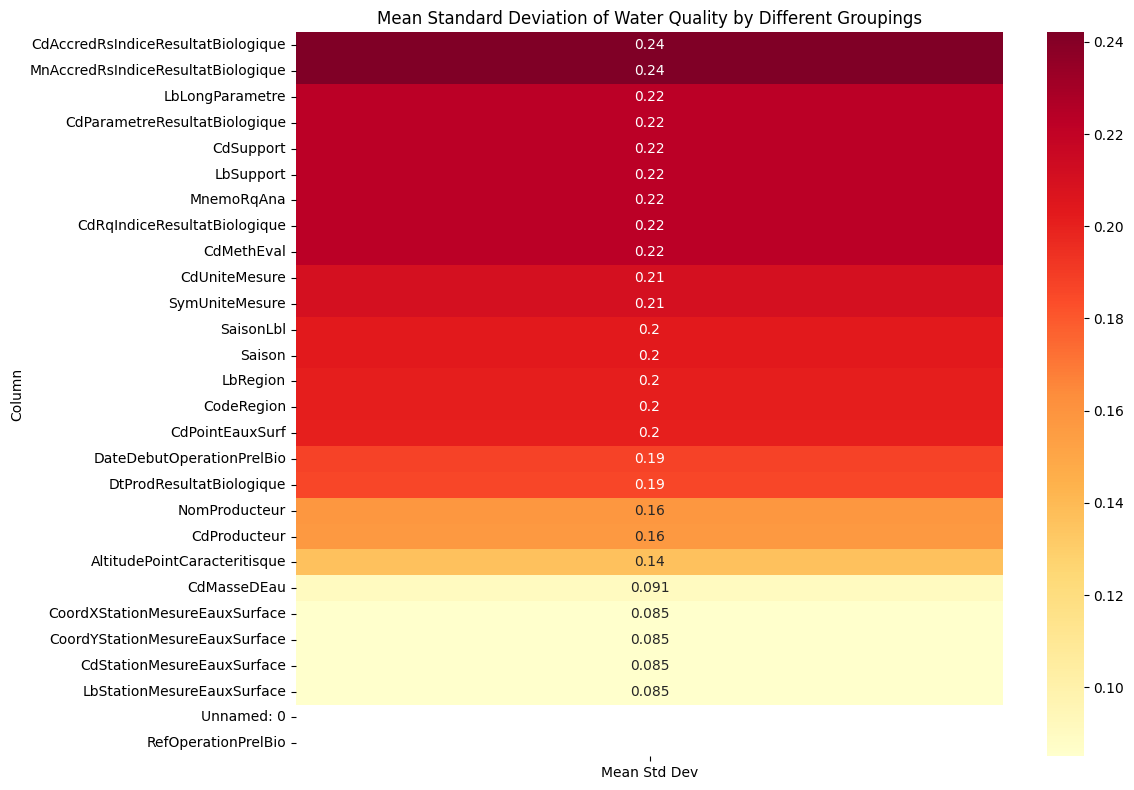

In [151]:
# Check if water quality is same inside different groupings (compute stdev groupby each column)
stdevs = {}
for col in df_hydrobio_merged.columns:
    if col != "ResIndiceResultatBiologique":
        try:
            res = df_hydrobio_merged.groupby(col)["ResIndiceResultatBiologique"].std()
            stdevs[col] = res.mean()
        except:
            continue

# Convert to dataframe for heatmap
stdevs_df = pd.DataFrame(list(stdevs.items()), columns=['Column', 'Mean Std Dev'])
stdevs_df = stdevs_df.sort_values('Mean Std Dev', ascending=False)

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(stdevs_df.set_index('Column'), annot=True, cmap='YlOrRd')
plt.title('Mean Standard Deviation of Water Quality by Different Groupings')
plt.tight_layout()
plt.show()


# Partie 1

In [53]:
bad_indice = df_hydrobio_merged[df_hydrobio_merged["ResIndiceResultatBiologique"] < 0.40]
good_indice = df_hydrobio_merged[df_hydrobio_merged["ResIndiceResultatBiologique"] >= 0.70]

print(f"bad indice {bad_indice.shape}")
print(f"good indice {good_indice.shape}")

bad indice (5988, 29)
good indice (7466, 29)


In [54]:
# find stations where some measurements are good and some are bad, (different measurement times)
bad_stations = set(bad_indice["CdStationMesureEauxSurface"].tolist())
good_stations = set(good_indice["CdStationMesureEauxSurface"].tolist())

mix = bad_stations.intersection(good_stations)
only_bad = bad_stations - mix 
only_good = good_stations - mix

print(f"{len(only_bad)=}, {len(only_good)=}, {len(mix)=}") 

# both 1135
# station 6215800 bad : 10, good : 4
# station 6066000 bad : 12, good : 3
# station 6133000 bad : 11, good : 4
# station 5100000 bad : 1, good : 14

len(only_bad)=1299, len(only_good)=1348, len(mix)=173


In [66]:
# 6215800
# remove df columns limit
pd.set_option("display.max_columns", None)
df_hydrobio_merged[df_hydrobio_merged["CdStationMesureEauxSurface"] == "6133000"]

df_physico_chill = df_physico[df_physico["LbLongParamètre"] == "Ammonium"]
df_physico_chill[
    df_physico_chill["CdStationMesureEauxSurface"] == "6133000"
].sort_values("DatePrel").head()


,CdStationMesureEauxSurface,LbStationMesureEauxSurface,CdSupport,LbSupport,CdFractionAnalysee,LbFractionAnalysee,CdPrelevement,DatePrel,HeurePrel,CdParametre,LbLongParamètre,RsAna,CdUniteMesure,SymUniteMesure,CdRqAna,MnemoRqAna,CdInsituAna,LbInsituAna,ProfondeurPrel,CdDifficulteAna,MnemoDifficulteAna,LdAna,LqAna,LsAna,IncertAna,CdMetFractionnement,NomMetFractionnement,CdMethode,NomMethode,RdtExtraction,CdMethodeExtraction,NomMethodeExtraction,CdAccreAna,MnemoAccredAna,AgreAna,CdStatutAna,MnemoStatutAna,CdQualAna,LbQualAna,CommentairesAna,ComResultatAna,CdRdd,NomRdd,CdProducteur,NomProducteur,CdPreleveur,NomPreleveur,CdLaboratoire,NomLaboratoire,CoordXStationMesureEauxSurface,CoordYStationMesureEauxSurface,CodeRegion,AltitudePointCaracteritisque,Saison,SaisonLbl
71818,6133000,ISERE A SEEZ,3,Eau,3,"Phase aqueuse de l'eau (filtrée, centrifugée...)",477625,2005-02-22,00:00:00,1335,Ammonium,0.05,169,mg(NH4)/L,10,Résultat < au seuil de quantification,2,Laboratoire,NaN,0,Difficultés inconnues,NaN,NaN,NaN,NaN,NaN,NaN,2,Méthode non fixée,NaN,NaN,NaN,0,Inconnu,NaN,3,Donnée contrôlée niveau 2 (données validées),1,Correcte,NaN,NaN,NaN,NaN,18690155900069,AGENCE EAU RHONE MEDITERRANEE ET CORSE,0,Interlocuteur inconnu,0,Interlocuteur inconnu,998015.0,6508665.0,84.0,843.0,1,Hiver
71832,6133000,ISERE A SEEZ,3,Eau,3,"Phase aqueuse de l'eau (filtrée, centrifugée...)",477626,2005-03-02,00:00:00,1335,Ammonium,0.05,169,mg(NH4)/L,10,Résultat < au seuil de quantification,2,Laboratoire,NaN,0,Difficultés inconnues,NaN,NaN,NaN,NaN,NaN,NaN,2,Méthode non fixée,NaN,NaN,NaN,0,Inconnu,NaN,3,Donnée contrôlée niveau 2 (données validées),1,Correcte,NaN,NaN,NaN,NaN,18690155900069,AGENCE EAU RHONE MEDITERRANEE ET CORSE,0,Interlocuteur inconnu,0,Interlocuteur inconnu,998015.0,6508665.0,84.0,843.0,1,Hiver
71846,6133000,ISERE A SEEZ,3,Eau,3,"Phase aqueuse de l'eau (filtrée, centrifugée...)",477627,2005-06-14,00:00:00,1335,Ammonium,0.05,169,mg(NH4)/L,10,Résultat < au seuil de quantification,2,Laboratoire,NaN,0,Difficultés inconnues,NaN,NaN,NaN,NaN,NaN,NaN,2,Méthode non fixée,NaN,NaN,NaN,0,Inconnu,NaN,3,Donnée contrôlée niveau 2 (données validées),1,Correcte,NaN,NaN,NaN,NaN,18690155900069,AGENCE EAU RHONE MEDITERRANEE ET CORSE,0,Interlocuteur inconnu,0,Interlocuteur inconnu,998015.0,6508665.0,84.0,843.0,2,Printemps
71860,6133000,ISERE A SEEZ,3,Eau,3,"Phase aqueuse de l'eau (filtrée, centrifugée...)",478866,2005-08-09,00:00:00,1335,Ammonium,0.05,169,mg(NH4)/L,10,Résultat < au seuil de quantification,2,Laboratoire,NaN,0,Difficultés inconnues,NaN,NaN,NaN,NaN,NaN,NaN,2,Méthode non fixée,NaN,NaN,NaN,0,Inconnu,NaN,3,Donnée contrôlée niveau 2 (données validées),1,Correcte,NaN,NaN,NaN,NaN,18690155900069,AGENCE EAU RHONE MEDITERRANEE ET CORSE,0,Interlocuteur inconnu,0,Interlocuteur inconnu,998015.0,6508665.0,84.0,843.0,3,Été
71874,6133000,ISERE A SEEZ,3,Eau,3,"Phase aqueuse de l'eau (filtrée, centrifugée...)",478867,2005-09-20,00:00:00,1335,Ammonium,0.05,169,mg(NH4)/L,10,Résultat < au seuil de quantification,2,Laboratoire,NaN,0,Difficultés inconnues,NaN,NaN,NaN,NaN,NaN,NaN,2,Méthode non fixée,NaN,NaN,NaN,0,Inconnu,NaN,3,Donnée contrôlée niveau 2 (données validées),1,Correcte,NaN,NaN,NaN,NaN,18690155900069,AGENCE EAU RHONE MEDITERRANEE ET CORSE,0,Interlocuteur inconnu,0,Interlocuteur inconnu,998015.0,6508665.0,84.0,843.0,3,Été


C:\Users\spoto\AppData\Local\Temp\ipykernel_2464\1501255512.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x="Category", y="Count", palette=colors)


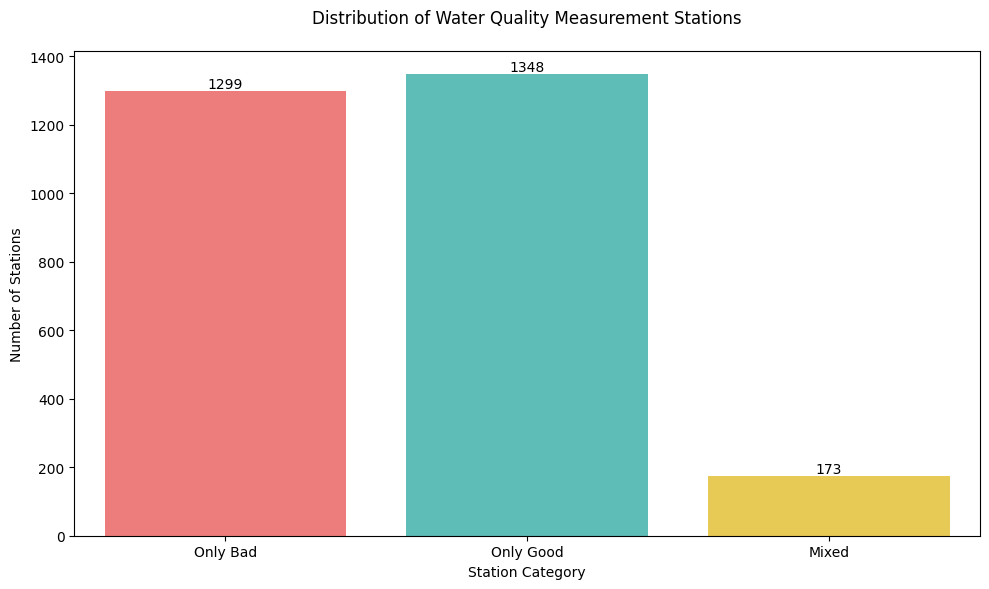

In [7]:
# Create data for the plot
data = {
    "Category": ["Only Bad", "Only Good", "Mixed"],
    "Count": [len(only_bad), len(only_good), len(mix)],
}

df_plot = pd.DataFrame(data)

# Define custom colors that better represent the categories
colors = [
    "#FF6B6B",
    "#4ECDC4",
    "#FFD93D",
]  # Red for bad, turquoise for good, yellow for mixed

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_plot, x="Category", y="Count", palette=colors)

# Customize the plot
plt.title("Distribution of Water Quality Measurement Stations", pad=20)
plt.ylabel("Number of Stations")
plt.xlabel("Station Category")

# Add value labels on top of each bar
for i, v in enumerate(df_plot["Count"]):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.tight_layout()
plt.show()

In [49]:
# Get data for bad and good stations where nitrate is between 0 and 50
bad_stations_data = df_physico_nitrites_merged[
    (df_physico_nitrites_merged["CdStationMesureEauxSurface"].isin(only_bad)) &
    (df_physico_nitrites_merged["RsAna"].between(0, 80))
]["RsAna"]
avg, std = bad_stations_data.mean(), bad_stations_data.std()
good_stations_data = df_physico_nitrites_merged[
    (df_physico_nitrites_merged["CdStationMesureEauxSurface"].isin(only_good)) &
    (df_physico_nitrites_merged["RsAna"].between(0, 80))
]["RsAna"]
avg_good, std_good = good_stations_data.mean(), good_stations_data.std()
print(f"bad stations avg {avg:.2f}  std {std:.2f}")
print(f"good stations avg {avg_good:.2f}  std {std_good:.2f}")

# Plot distributions
plt.figure(figsize=(12, 6))

# Plot both distributions on same axes with normalized counts
sns.histplot(
    data=bad_stations_data,
    bins=30,
    color="red",
    alpha=0.4,
    label="Bad Quality Stations",
    stat="density"
)
sns.histplot(
    data=good_stations_data,
    bins=30,
    color="green",
    alpha=0.4,
    label="Good Quality Stations",
    stat="density"
)

# Add mean lines
plt.axvline(avg, color="darkred", linestyle="--", label=f"Bad Mean: {avg:.2f}")
plt.axvline(
    avg_good, color="darkgreen", linestyle="--", label=f"Good Mean: {avg_good:.2f}"
)

plt.title("Distribution of Nitrites by Station Quality (Normalized)")
plt.xlabel("Nitrites Concentration")
plt.ylabel("Density")
plt.legend()

plt.tight_layout()
plt.show()

NameError: name 'df_physico_nitrites_merged' is not defined

In [21]:
df_hydrobio_merged.columns

Index(['Unnamed: 0', 'CdStationMesureEauxSurface',
       'LbStationMesureEauxSurface', 'CdPointEauxSurf',
       'DateDebutOperationPrelBio', 'CdSupport', 'LbSupport',
       'DtProdResultatBiologique', 'CdParametreResultatBiologique',
       'LbLongParametre', 'ResIndiceResultatBiologique', 'CdUniteMesure',
       'SymUniteMesure', 'CdRqIndiceResultatBiologique', 'MnemoRqAna',
       'CdMethEval', 'RefOperationPrelBio', 'CdProducteur', 'NomProducteur',
       'CdAccredRsIndiceResultatBiologique',
       'MnAccredRsIndiceResultatBiologique', 'Saison', 'SaisonLbl',
       'CoordXStationMesureEauxSurface', 'CoordYStationMesureEauxSurface',
       'CodeRegion', 'LbRegion', 'CdMasseDEau',
       'AltitudePointCaracteritisque'],
      dtype='object')

In [71]:
# for each station we find the last measured bio indice
df_training = df_hydrobio_merged[
    [
        "CdStationMesureEauxSurface",
        "DateDebutOperationPrelBio",
        "ResIndiceResultatBiologique",
        "CodeRegion",
        "Saison"
    ]
]

# keep only the last indice
df_training = df_training.sort_values(by="DateDebutOperationPrelBio", ascending=False)
df_training = df_training.drop_duplicates(
    subset=["CdStationMesureEauxSurface"], keep="first"
)

df_training.head()

,CdStationMesureEauxSurface,DateDebutOperationPrelBio,ResIndiceResultatBiologique,CodeRegion,Saison
22169,6999153,2022-12-01,0.5180,84.0,4
22077,6820131,2022-12-01,0.3270,84.0,4
19230,4068918,2022-10-13,0.8604,24.0,4
20267,5173400,2022-10-13,0.9401,76.0,4
20261,5170900,2022-10-12,0.8180,76.0,4


In [34]:
df_physico["LbLongParamètre"].value_counts()

LbLongParamètre
Température de l'Eau                                   366243
Potentiel en Hydrogène (pH)                            365874
Conductivité à 25°C                                    361762
Oxygène dissous                                        340240
Taux de saturation en oxygène                          323035
Matières en suspension                                 312374
Phosphore total                                        302234
Demande Biochimique en oxygène en 5 jours (D.B.O.5)    291314
Nitrates                                               290545
Orthophosphates (PO4)                                  288418
Carbone Organique                                      286897
Nitrites                                               283151
Azote Kjeldahl                                         282802
Ammonium                                               274458
Turbidité Formazine Néphélométrique                    218603
Diuron                                                

In [72]:
def add_columns_for_training(train, column_names, df_other) -> pd.DataFrame:
    df_training_final = train.copy()

    for column_name in column_names:
        df_reduced = df_other[df_other["LbLongParamètre"] == column_name]

        df_to_add = df_reduced[["CdStationMesureEauxSurface", "DatePrel", "RsAna"]]

        df_training_with_new_col = pd.merge(
            df_training_final, df_to_add, on="CdStationMesureEauxSurface", how="left"
        )

        df_training_with_new_col["date_diff"] = (
            pd.to_datetime(df_training_with_new_col["DateDebutOperationPrelBio"])
            - pd.to_datetime(df_training_with_new_col["DatePrel"])
        ).dt.days

        df_training_with_new_col = df_training_with_new_col[
            (df_training_with_new_col["date_diff"] >= 0)
            & (df_training_with_new_col["date_diff"] <= 365)
        ]

        # Group by station and take the mean of measurements
        df_grouped = df_training_with_new_col.groupby("CdStationMesureEauxSurface").agg(
            {
                "DateDebutOperationPrelBio": "first",
                "ResIndiceResultatBiologique": "first",
                "RsAna": "last",
            }
        )

        # Add the new column to df_training_final
        df_training_final = df_training_final.join(
            df_grouped["RsAna"].rename(column_name), on="CdStationMesureEauxSurface"
        )

        print(f"Added {column_name}, shape: {df_training_final.shape}")

    return df_training_final


df_training.head()
columns_to_add = df_physico["LbLongParamètre"].unique()
df_training_final = add_columns_for_training(df_training, columns_to_add, df_physico)
df_training_final.head()

Added Température de l'Eau, shape: (3425, 6)
Added Potentiel en Hydrogène (pH), shape: (3425, 7)
Added Conductivité à 25°C, shape: (3425, 8)
Added Oxygène dissous, shape: (3425, 9)
Added Taux de saturation en oxygène, shape: (3425, 10)
Added Demande Biochimique en oxygène en 5 jours (D.B.O.5), shape: (3425, 11)
Added Phosphore total, shape: (3425, 12)
Added Turbidité Formazine Néphélométrique, shape: (3425, 13)
Added Matières en suspension, shape: (3425, 14)
Added Azote Kjeldahl, shape: (3425, 15)
Added Diuron, shape: (3425, 16)
Added Carbone Organique, shape: (3425, 17)
Added Ammonium, shape: (3425, 18)
Added Nitrites, shape: (3425, 19)
Added Nitrates, shape: (3425, 20)
Added Orthophosphates (PO4), shape: (3425, 21)


,CdStationMesureEauxSurface,DateDebutOperationPrelBio,ResIndiceResultatBiologique,CodeRegion,Saison,Température de l'Eau,Potentiel en Hydrogène (pH),Conductivité à 25°C,Oxygène dissous,Taux de saturation en oxygène,Demande Biochimique en oxygène en 5 jours (D.B.O.5),Phosphore total,Turbidité Formazine Néphélométrique,Matières en suspension,Azote Kjeldahl,Diuron,Carbone Organique,Ammonium,Nitrites,Nitrates,Orthophosphates (PO4)
22169,6999153,2022-12-01,0.5180,84.0,4,7.1,8.4,714.0,11.5,99.0,1.2,0.036,NaN,2.0,0.50,0.005,4.5,0.01,0.02,26.0,0.07
22077,6820131,2022-12-01,0.3270,84.0,4,7.6,8.4,544.0,11.6,100.0,0.9,0.029,NaN,66.0,0.50,NaN,2.2,0.01,0.01,18.0,0.05
19230,4068918,2022-10-13,0.8604,24.0,4,19.2,6.7,64.0,7.6,82.6,1.5,0.056,40.0,74.0,0.99,NaN,8.0,0.05,0.02,2.1,0.01
20267,5173400,2022-10-13,0.9401,76.0,4,4.4,7.7,62.0,NaN,100.0,NaN,NaN,1.1,2.0,NaN,0.020,NaN,NaN,NaN,NaN,NaN
20261,5170900,2022-10-12,0.8180,76.0,4,6.7,8.1,174.0,12.5,104.0,NaN,NaN,3.7,4.7,NaN,0.020,NaN,NaN,NaN,NaN,NaN


In [36]:
df_physico["LbLongParamètre"].value_counts()

LbLongParamètre
Température de l'Eau                                   366243
Potentiel en Hydrogène (pH)                            365874
Conductivité à 25°C                                    361762
Oxygène dissous                                        340240
Taux de saturation en oxygène                          323035
Matières en suspension                                 312374
Phosphore total                                        302234
Demande Biochimique en oxygène en 5 jours (D.B.O.5)    291314
Nitrates                                               290545
Orthophosphates (PO4)                                  288418
Carbone Organique                                      286897
Nitrites                                               283151
Azote Kjeldahl                                         282802
Ammonium                                               274458
Turbidité Formazine Néphélométrique                    218603
Diuron                                                

In [74]:
df_training_final.head()
# count nan
df_training_final.isna().sum()
df_training_final.dropna(inplace=True)
df_training_final.shape

(1481, 21)

In [76]:
print(df_training_final.head())

      CdStationMesureEauxSurface DateDebutOperationPrelBio  \
21340                    6175517                2022-10-11   
21338                    6175400                2022-10-10   
20436                    5236100                2022-09-30   
19387                    4103500                2022-09-29   
22022                    6710020                2022-09-29   

       ResIndiceResultatBiologique  CodeRegion  Saison  Température de l'Eau  \
21340                       0.9180        76.0       4                   4.7   
21338                       0.8210        76.0       4                  11.6   
20436                       0.8007        76.0       3                   6.4   
19387                       0.4296        24.0       3                   9.6   
22022                       0.5330        93.0       3                  23.3   

       Potentiel en Hydrogène (pH)  Conductivité à 25°C  Oxygène dissous  \
21340                          7.3                 64.0             11

In [75]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR

# Prepare data
# Get numeric columns from physico parameters
numeric_cols = list(df_physico["LbLongParamètre"].unique())

# Create feature matrix with numeric columns and CodeRegion as categorical
X = df_training_final[numeric_cols].copy()
X["CodeRegion"] = df_training_final["CodeRegion"].astype("category")
X["Saison"] = df_training_final["Saison"].astype("category")
y = df_training_final["ResIndiceResultatBiologique"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dictionary of models
models = {
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=1.0),
    "ElasticNet": ElasticNet(alpha=1.0, l1_ratio=0.5),
    "SVR": SVR(kernel="rbf"),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "CatBoost": CatBoostRegressor(iterations=100, random_state=42, verbose=False),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
}

# Evaluate each model
results = {}
for name, model in models.items():
    cv_rmse = -cross_val_score(
        model, X_scaled, y, scoring="neg_root_mean_squared_error", cv=5
    )
    cv_r2 = cross_val_score(model, X_scaled, y, scoring="r2", cv=5)

    results[name] = {
        "RMSE": f"{cv_rmse.mean():.4f} ± {cv_rmse.std():.4f}",
        "R2": f"{cv_r2.mean():.4f} ± {cv_r2.std():.4f}",
    }

# Print results
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"RMSE: {metrics['RMSE']}")
    print(f"R2: {metrics['R2']}")
    print("---------------------------------")


Ridge:
RMSE: 0.2009 ± 0.0136
R2: 0.1959 ± 0.0900
---------------------------------

Lasso:
RMSE: 0.2337 ± 0.0115
R2: -0.0874 ± 0.0756
---------------------------------

ElasticNet:
RMSE: 0.2337 ± 0.0115
R2: -0.0874 ± 0.0756
---------------------------------

SVR:
RMSE: 0.1825 ± 0.0153
R2: 0.3369 ± 0.0836
---------------------------------

RandomForest:
RMSE: 0.1740 ± 0.0141
R2: 0.3985 ± 0.0615
---------------------------------

CatBoost:
RMSE: 0.1758 ± 0.0166
R2: 0.3849 ± 0.0821
---------------------------------

GradientBoosting:
RMSE: 0.1728 ± 0.0163
R2: 0.4057 ± 0.0815
---------------------------------


In [78]:
# Train gradient boosting on all data

# Train the model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_scaled, y)

# Run 5 random predictions and show the results in a dataframe
np.random.seed(42)
random_indices = np.random.randint(0, len(X), 5)
random_predictions = model.predict(X_scaled[random_indices])

# Get the actual feature values for these samples
random_features = X.iloc[random_indices]

# Create results dataframe with all variables
random_results = pd.DataFrame(
    {
        "Nitrates": random_features["Nitrates"],
        "Temperature": random_features["Température de l'Eau"],
        "Conductivity": random_features["Conductivité à 25°C"],
        "Oxygen": random_features["Oxygène dissous"],
        "Actual": y.iloc[random_indices].values,
        "Predicted": random_predictions,
    }
)

print(random_results)


       Nitrates  Temperature  Conductivity  Oxygen  Actual  Predicted
18400       1.5          9.9          44.0     9.5  0.7943   0.749208
5917        3.3         15.8         459.0    11.2  0.5590   0.621071
19375      15.0         13.9         257.0     8.8  0.2537   0.322375
14577      11.6         16.9         461.0     9.3  0.7100   0.683560
18405       2.8         15.9          54.0     9.5  0.8734   0.672439
